In [1]:
%matplotlib inline

# TiO2/SiO2 Bragg mirror simulation
Authors: O. Castany, M.Müller

This notebook simulates a Bragg mirror composed of alternating layers of TiO₂ and SiO₂, each a quarter-wavelength thick at a central wavelength of 1550 nm.
The mirror contains 8.5 periods, with air as the incident medium and glass as the substrate.

In [2]:
import elli
import elli.plot as elliplot
import matplotlib.pyplot as plt
import numpy as np

np.set_printoptions(suppress=True, precision=3)

## Material definition
We define all required materials with constant (non-dispersive) refractive indicies.

Air as incidence material and glass as exit material. The Bragg mirror materials are SiO2 and TiO2.

In [3]:
air = elli.AIR
glass = elli.ConstantRefractiveIndex(1.5).get_mat()
SiO2 = elli.ConstantRefractiveIndex(1.47).get_mat()
TiO2 = elli.ConstantRefractiveIndex(2.23 + 1j * 5.2e-4).get_mat()

## Calculate layer thickness and create layers
The SiO2 and TiO2 layers are set to the thickness of an
quarterwaveplate of the respective material at 1550 nm.

In [4]:
lbda0 = 1550

d_SiO2 = elli.get_qwp_thickness(SiO2, lbda0)
d_TiO2 = elli.get_qwp_thickness(TiO2, lbda0)

print("Thickness of the SiO2 QWP: {} nm".format(d_SiO2))
print("Thickness of the TiO2 QWP: {} nm".format(d_TiO2))

L_SiO2 = elli.Layer(SiO2, d_SiO2)
L_TiO2 = elli.Layer(TiO2, d_TiO2)

Thickness of the SiO2 QWP: 263.6054421768708 nm
Thickness of the TiO2 QWP: 173.76681614349775 nm


# Build the Bragg Mirror Structure

We now build the multilayer stack:

Alternating layers of TiO2 / SiO2:

8 full periods + 1 TiO2 layer at the end → "8.5 periods"

Placed between air (front) and glass (back)

In [5]:
# Define periodic stack
# Repeated layers: 8.5 periods: Parameters (Substructure, repetitions, number of layers before, number of layers after the stack)
layerstack = elli.RepeatedLayers([L_TiO2, L_SiO2], 8, 0, 1)

# Build full structure
s = elli.Structure(air, [layerstack], glass)

## Structure Graph: Visualization of the refractive index profile in z-direction.

<Axes: xlabel='z (nm)', ylabel="n'">

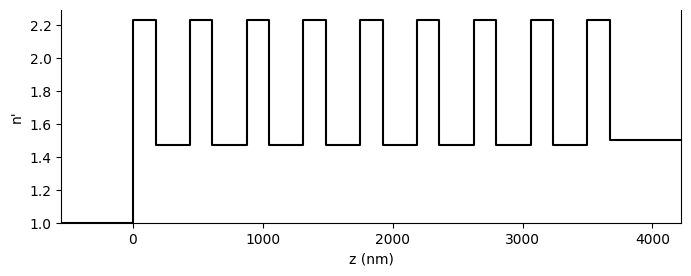

In [6]:
elliplot.draw_structure(s)

## Optical calculation

Calculation of the reflection and transmission of the structure at normal incidence (0°).

In [7]:
(lbda1, lbda2) = (1100, 2500)
lbda_list = np.linspace(lbda1, lbda2, 200)

data = s.evaluate(lbda_list, 0)

R = data.R
T = data.T

## Plot Reflection and Transmission data

The plot shows the high reflection in the stopband region around the design wavelength and the interference patterns around it.

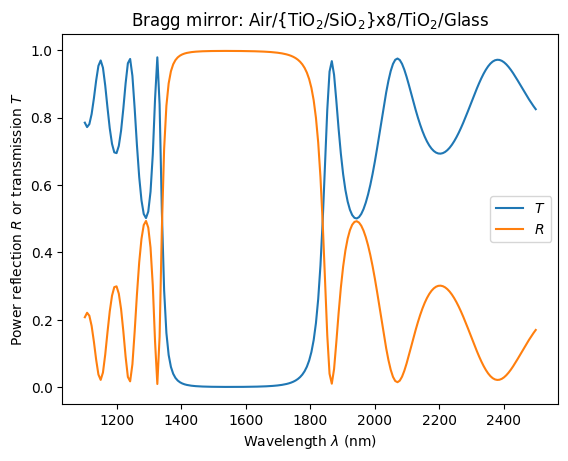

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(lbda_list, T, label="$T$")
ax.plot(lbda_list, R, label="$R$")
ax.legend(loc="center right")
ax.set_xlabel(r"Wavelength $\lambda$ (nm)")
ax.set_ylabel(r"Power reflection $R$ or transmission $T$")
ax.set_title(r"Bragg mirror: Air/{TiO$_2$/SiO$_2$}x8/TiO$_2$/Glass")
plt.show()